# Load the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from datetime import datetime
import cufflinks as cf
import seaborn as sns

C:\Users\keyur\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0



# Load all csv files

In [37]:
station_list_india = pd.read_csv("../air-quality-india/stations_india.csv")
station_list_madrid = pd.read_csv("../air-quality-madrid/stations.csv")
city_day = pd.read_csv("../air-quality-india/city_day.csv")
city_hour = pd.read_csv("../air-quality-india/city_hour.csv")
station_day = pd.read_csv("../air-quality-india/station_day.csv")
station_hour = pd.read_csv("../air-quality-india/station_hour.csv")
madrid_2015 = pd.read_csv("../air-quality-madrid/madrid_2015.csv")
madrid_2016 = pd.read_csv("../air-quality-madrid/madrid_2016.csv")
madrid_2017 = pd.read_csv("../air-quality-madrid/madrid_2017.csv")
madrid_2018 = pd.read_csv("../air-quality-madrid/madrid_2018.csv")

# Data cleaning
#### Rename the column names

In [38]:
station_list_madrid.rename(columns = {'id':'StationId', 'name':'StationName'}, inplace = True)
station_list_india.rename(columns = {'City':'City_Station', 'State': 'State_Station', 'Status': 'Status_Station', 'Region':'Region_Station'}, inplace = True)
city_hour.rename(columns = {'Datetime':'Date'}, inplace = True)
station_hour.rename(columns = {'Datetime':'Date'}, inplace = True)

#### Remove the unnecessary columns

In [39]:
station_list_madrid['StationId'] = station_list_madrid['StationId'].astype('object')
station_list_india.drop(station_list_india.columns[0], axis=1, inplace=True)

#### Change the datatype of column

In [42]:
station_list_madrid['StationId'] = station_list_madrid['StationId'].astype('object')

#### Merge the files

In [46]:
station_list = pd.concat([station_list_madrid, station_list_india], ignore_index=True, sort=False)
india_data = pd.concat([station_day, station_hour, city_hour, city_day])
madrid_data = pd.concat([madrid_2015, madrid_2016, madrid_2017, madrid_2018])
india_data['Date'] = pd.to_datetime(india_data.Date)

#### Remove the null values

In [47]:
filtered_india_data = india_data.dropna()
filtered_madrid_data = madrid_data.dropna()

#### Rename the column name

In [56]:
filtered_madrid_data.rename(columns = {'date':'Date', 'station': 'StationId', 'BEN': 'Benzene', 'NO_2':'NO2', 'O_3': 'O3', 'SO_2': 'SO2'}, inplace = True)
filtered_madrid_data['Region'] = 'Spain'
filtered_madrid_data['Date'] = pd.to_datetime(filtered_madrid_data.Date)
filtered_india_data.drop(filtered_india_data.columns[0], axis=1, inplace=True)

#### Merge the Air Quality data into one file

In [57]:
aq_data = pd.concat([filtered_india_data, filtered_madrid_data], ignore_index=True, sort=False)

In [59]:
aq_data.dtypes

StationId                         object
Date                      datetime64[ns]
PM2.5                            float64
PM10                             float64
NO                               float64
NO2                              float64
NOx                              float64
NH3                              float64
CO                               float64
SO2                              float64
O3                               float64
Benzene                          float64
Toluene                          float64
Xylene                           float64
AQI                              float64
AQI_Bucket                        object
StationName                       object
City                              object
State                             object
Status                            object
Region                            object
Month                             object
Year                             float64
Season                            object
Weekday_or_weeke

In [50]:
station_list.dtypes

StationId          object
StationName        object
address            object
lon               float64
lat               float64
elevation         float64
City_Station       object
State_Station      object
Status_Station     object
Region_Station     object
dtype: object

# Check for outliers

In [60]:
final_data = pd.merge(aq_data, station_list, on = 'StationId')

<AxesSubplot:>

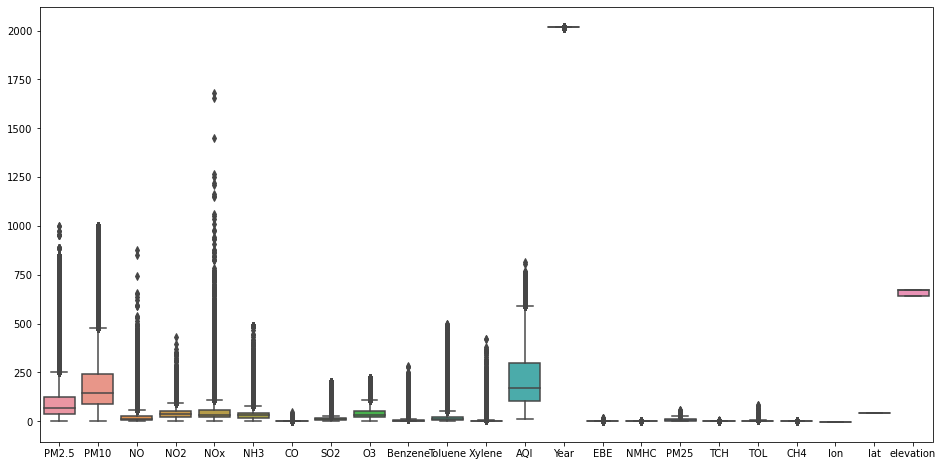

In [61]:
plt.figure(figsize=(16,8))
sns.boxplot(data=final_data)

In [62]:
drop_outlier = final_data[(final_data['AQI']>500) | (final_data['PM2.5']>180) | (final_data['PM10']>350) |(final_data['NO']>80) | (final_data['NO2']>90) | (final_data['NOx']>100) | (final_data['NH3']>90) | (final_data['CO']>40) | (final_data['SO2']>40) | (final_data['O3']>90) | (final_data['Benzene']>40) | (final_data['Toluene']>40) | (final_data['Xylene']>40) | (final_data['EBE']>30) | (final_data['NMHC']>30) | (final_data['PM25']>40) | (final_data['TCH']>40) | (final_data['CH4']>40) | (final_data['TOL']>40)].index
final_data = final_data.drop(drop_outlier)

# Generate the final file of dataset & Save 

In [64]:
final_data.to_csv('../final_dataset.csv',index = False)

In [65]:
final_data = pd.read_csv('../final_dataset.csv', low_memory=False)

In [66]:
final_data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,CH4,StationName_y,address,lon,lat,elevation,City_Station,State_Station,Status_Station,Region_Station
0,AP001,2017-11-26 06:00:00,98.25,137.75,0.38,31.75,17.18,9.00,0.10,12.12,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
1,AP001,2017-11-26 07:00:00,103.00,144.75,1.37,40.50,22.70,9.67,0.10,10.42,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
2,AP001,2017-11-26 20:00:00,80.00,159.50,3.97,41.65,25.40,11.25,0.18,12.47,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
3,AP001,2017-11-26 21:00:00,84.00,160.00,0.73,48.07,26.20,11.20,0.50,12.10,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
4,AP001,2017-11-26 22:00:00,95.75,172.75,1.35,34.12,19.25,9.83,0.53,10.23,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western


In [67]:
final_data

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,CH4,StationName_y,address,lon,lat,elevation,City_Station,State_Station,Status_Station,Region_Station
0,AP001,2017-11-26 06:00:00,98.25,137.75,0.38,31.75,17.18,9.00,0.10,12.12,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
1,AP001,2017-11-26 07:00:00,103.00,144.75,1.37,40.50,22.70,9.67,0.10,10.42,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
2,AP001,2017-11-26 20:00:00,80.00,159.50,3.97,41.65,25.40,11.25,0.18,12.47,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
3,AP001,2017-11-26 21:00:00,84.00,160.00,0.73,48.07,26.20,11.20,0.50,12.10,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
4,AP001,2017-11-26 22:00:00,95.75,172.75,1.35,34.12,19.25,9.83,0.53,10.23,...,NaN,"Secretariat, Amaravati - APPCB",NaN,NaN,NaN,NaN,Amaravati,Andhra Pradesh,Active,5. Western
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185716,28079024,2018-01-31 09:00:00,NaN,11.00,14.00,33.00,54.00,NaN,0.20,4.00,...,1.16,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642.0,NaN,NaN,NaN,NaN
1185717,28079024,2018-01-31 10:00:00,NaN,14.00,32.00,33.00,83.00,NaN,0.30,4.00,...,1.19,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642.0,NaN,NaN,NaN,NaN
1185718,28079024,2018-01-31 16:00:00,NaN,25.00,18.00,50.00,77.00,NaN,0.30,6.00,...,1.11,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642.0,NaN,NaN,NaN,NaN
1185719,28079024,2018-01-31 17:00:00,NaN,21.00,16.00,54.00,79.00,NaN,0.30,6.00,...,1.11,Casa de Campo,Casa de Campo (Terminal del Teleférico),-3.747347,40.419356,642.0,NaN,NaN,NaN,NaN
